# Automation_of_occupations_consequences_for_the_USA

Nobody has a crystal ball that can tell the future, but some people don’t need an ancient relic to foresee what’s going to haven, because they are currently building the future in which we will all live.

It’s true that AI and Automation will wreak havoc among the workforce rending a large part of the population useless and without economic value.

Not only they will take your jobs, but they will make the rich even richer.

If you are looking for job opportunities which are less likely to be affected by AI or automation, well you’re in the right place.

Questions to analyse:

1. Which occupatios are the most sensitive and the most robust to automatisation (computerisation)?
2. See, how looks data distribution
3. What is the jobs loss in the US, if automatisation take out occupations with automatisation probability equal to 0.7 or higher?
4. Which US states are the most sensitive and the most robust to automatisation?
5. Compare most common occupations or automatisation

# I. Data import and functions
# Sukelt paveikslelius i img folderi.
# Padaryt paveikslėliu braizymo ir kitas funkcijas def

In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# import os
from textwrap import wrap
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=3)

In [178]:
def plot_heatmap(data_in, title_in, number):
    '''
    Inputs:
        data_in: Data Frame of objects and floats;
        title_in: string, chart title;
        number: boolean, for showing or not showing number values in heatmap.
    Output: 
        heatmap chart.
    '''
    plt.figure(figsize=(30,20))
    sns.heatmap(data=data_in, annot=number) 
    plt.title('\n'.join(wrap(title_in)), fontsize=40, fontweight="bold", pad=40)
    plt.ylabel("")
    directory= 'img/'
    fig_name = '{}general_{}.png'.format(directory,title_in)
    plt.savefig(fname=fig_name, dpi=300, bbox_inches='tight') 

In [221]:
def barplot(data_in, x_data, y_data, title_in, hue_in, line):
    '''
    Inputs:
        data_in: Data Frame of objects and floats;
        x_data: float, x axis, number of jobs positions
        y_data: object, states names
        title_in: string, chart title (string);
        hue_in: float, used values threshold or None
        line: float, mean value line for bars.
    Output: 
        bar chart.
    '''
    plt.figure(figsize=(15,14))
    graph = sns.barplot(x=x_data, y=y_data, hue=hue_in, data=data_in, palette="twilight")
    plt.title('\n'.join(wrap(title_in)), fontsize=20, fontweight="bold", pad=20)
#     plt.xlabel("Number of jobs positions")
    graph.axvline(line)
    directory= 'img/'
    fig_name = '{}general_{}.png'.format(directory,title_in)
    plt.savefig(fname=fig_name, dpi=300, bbox_inches='tight')

In [180]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

def plot_pie(data_in, title_in, labels_in):
    '''
    Inputs:
        data_in: Data Frame of objects and floats;
        title_in: string, chart title;
        labels_in: object, occupation name.
    Output: 
        pie chart.
    '''
    plt.pie(
        # using data total arrests
        data_in,
        # with the labels being officer names
        labels=labels_in,
        # with no shadows
        shadow=True,
        # with colors
        colors=colors,
        # with one slide exploded out
        explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%',
        )
    plt.title(label='\n'.join(wrap(title_in, 40)), fontsize=20, fontweight="bold", loc="center", pad=20)
#     sns.set(font_scale=1.3)
    # View the plot drop above
    plt.axis('equal')

    # View the plot
#     plt.tight_layout()
    directory= 'img/'
    fig_name = '{}general_{}.png'.format(directory,title_in)
    plt.savefig(fname=fig_name, dpi=300, bbox_inches='tight') 

Import "Automation data by state"

In [181]:
Automation_data = "data/automation_data_by_state.csv"
A_data = pd.read_csv(Automation_data, encoding = "ISO-8859-1")
state_names = A_data.columns[3:]

Import "Occupation salary"

In [182]:
salary_data = "data/occupation_salary.xlsx"
S_data = pd.read_excel(salary_data, index_col="OCC_CODE")
# S_data.shape
# S_data.isnull().sum() #only in ANNUAL, HOURLY columns a lot of null values.

To compare occupation numbers in percentage, I need USA population data.
I couldn't read html in the Kaggle platorm, so I made csv data file in pycharm. The code here:

In [183]:
# link = 'https://www.infoplease.com/us/states/state-population-by-rank'
# w = pd.read_html(link, header=0)
# w[0].columns
# df_1 = w[0]
# condition = df_1['State'].isin(state_names)
# population_0 = df_1[condition]

Then I opened the US_population csv here:

In [184]:
link = 'data/US_population_2.csv'
population = pd.read_csv(link, header=0)
population.head() #- Census population - valstijos visos pupuliacijos skaičiai.
# null verčių stulpeliuose nėra

,Unnamed: 0,Rank,State,July 2019 Estimate,Percent of Total
0,0,1,California,39512223,11.91%
1,1,2,Texas,28995881,8.74%
2,2,3,Florida,21477737,6.47%
3,3,4,New York,19453561,5.86%
4,4,5,Illinois,12671821,3.86%


# II. Data cleaning and preparation for visualisations

## ????Salary data (S_data)

Drop emty columns: ANNUAL, HOURLY

In [185]:
S_data_clean = S_data.drop(['ANNUAL', 'HOURLY'], axis=1)

## Population data

Sort data by states and take only state and population columns

In [186]:
population_sort = population.sort_values(by=['State'])
states_pop = population_sort.loc[:, ['State', 'July 2019 Estimate']].reset_index()

## Automations data (A_data) preparation

Sum up all occupation workers for the US. After that I drop occupation lines, where are zero workers in all states. Then I sort data by US workers' numbers and by probability. Take 5 occupations with highest and 5 occupations with lowest automation probabilities.

In [187]:
us_sum = A_data[state_names].sum(axis=1)
us_sum_DF = pd.DataFrame({'US_workers':us_sum.values})
Occupation_proba = A_data[['Occupation', 'Probability']]
US_O_proba = Occupation_proba.join(us_sum_DF)
index_names = US_O_proba[ US_O_proba['US_workers'] == 0 ].index
US_worker = US_O_proba.drop(index_names).reset_index()
common_US_work = US_worker.drop(['index'], axis=1)

US_work = common_US_work.sort_values(by=['US_workers'], ascending=False).reset_index(drop=True)
US_sort_probability = common_US_work.sort_values(by=['Probability'], ascending=False).reset_index(drop=True)

A_head = US_sort_probability.head()
A_tail = US_sort_probability.tail()
highest_lowest_prob = pd.concat([A_head, A_tail])

Drop zero lines from (A_data) and set column "SOC" as index.

In [188]:
A_data_clean = A_data.drop(index_names).reset_index()
A_data_SOC = A_data_clean.set_index('SOC')

5 occupations with highest probability for automatisation, and 5 with lowest probability for automatisation

In [189]:
A_data_prob_sort = A_data_clean.sort_values(by=['Probability'], ascending=False).reset_index()
A_head_clean = A_data_prob_sort.head()
A_tail_clean = A_data_prob_sort.tail()

A_data_highest_lowest_prob = pd.concat([A_head_clean, A_tail_clean])
A_data_highest_lowest_prob_present = A_data_highest_lowest_prob.drop(['level_0', 'index'], axis=1).set_index('Occupation')

Transform occupation workers numbers per state to occupation workers population ratio. 

In [190]:
# Transform A_data
col_names = A_data_clean.columns
A_trans = pd.DataFrame(A_data_clean.values.T, columns=A_data_clean['SOC'], index=col_names)
A_tr = A_trans.iloc[4:]

# Number of occupations jobs in states divided by population of state. Then the data frame transformed back
reliative_popul = A_tr.div(states_pop['July 2019 Estimate'].values,axis=0)
reliative_popul = reliative_popul.fillna(0)
A_double_T = reliative_popul.T

# Join occupation and probability coulumns back to transformed data frame.
A_data_double_T = A_data_SOC[['Occupation', 'Probability']].join(A_double_T)

Group occupation to categories by mean probability and occupations groups ratio to population per state.

In [191]:
# Split SOC column to 'Occupation_group_no' and 'Occupation_no'
SOC_column = A_data_double_T.reset_index()
SOC_column['SOC'] = SOC_column.SOC.astype(str)
SOC_column[['Occupation_group_no','Occupation_no']] = SOC_column.SOC.str.split("-",expand=True,)
Group_data = SOC_column.copy()

# Group occupation categories by mean probability and occupations groups ratio to population per state
Group = Group_data.groupby(['Occupation_group_no']).Probability.mean()
Group_states = Group_data.groupby(['Occupation_group_no'])[state_names].sum()

# Titles of occupation groups
s = pd.Series(['Management', 'Business Operations', 'Computer and Mathematical', 'Architecture and Engineering', 'Life, Physical, and Social Science', 'Community and Social Service', 'Legal', 'Education, Training, and Library', 'Design, Entertainment and Sports', 'Healthcare Practitioners', 'Healthcare Support', 'Protective Service', 'Food Serving Related', 'Cleaning and Maintenance', 'Personal Care and Service', 'Sales and Related', 'Administrative Support', 'Farming, Fishing, and Forestry', 'Construction and Extraction', 'Installation and Repair', 'Production', 'Transportation'], index=['11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53'])

Occupations_groups_pd = pd.DataFrame({'index':s.index, 'Occupations groups':s.values}) # Make data frame from series
Occupations_groups = Occupations_groups_pd.set_index('index')

# Join data to one table and sort by probability
Occupations_groups_join1 = Occupations_groups.join(Group)
Occupations_groups_join2 = Occupations_groups_join1.join(Group_states)
Occupations_groups_prob_sort1 = Occupations_groups_join2.sort_values(by=['Probability'], ascending=False).reset_index()
Occupations_groups_prob_sort = Occupations_groups_prob_sort1.fillna(0)
Occupations_groups_prob_sort.head()

# Merge Occupations groups and probability columns to one
Occupations_groups_prob_round = Occupations_groups_prob_sort['Probability'].round(2)
Occupations_groups_prob_round_df = pd.DataFrame({'Probability':Occupations_groups_prob_round.values})
Occupations_groups_prob_sort["Occupations groups and Probability"] = Occupations_groups_prob_sort["Occupations groups"] + " " + Occupations_groups_prob_round_df["Probability"].astype(str)
Occupations_groups_plot = Occupations_groups_prob_sort.copy().set_index('Occupations groups and Probability')

# III. Data analysis topic
# IV. Data analysis topic2

# Heat map plot function
# Barplot function
# plt.pie function

Plot heat map

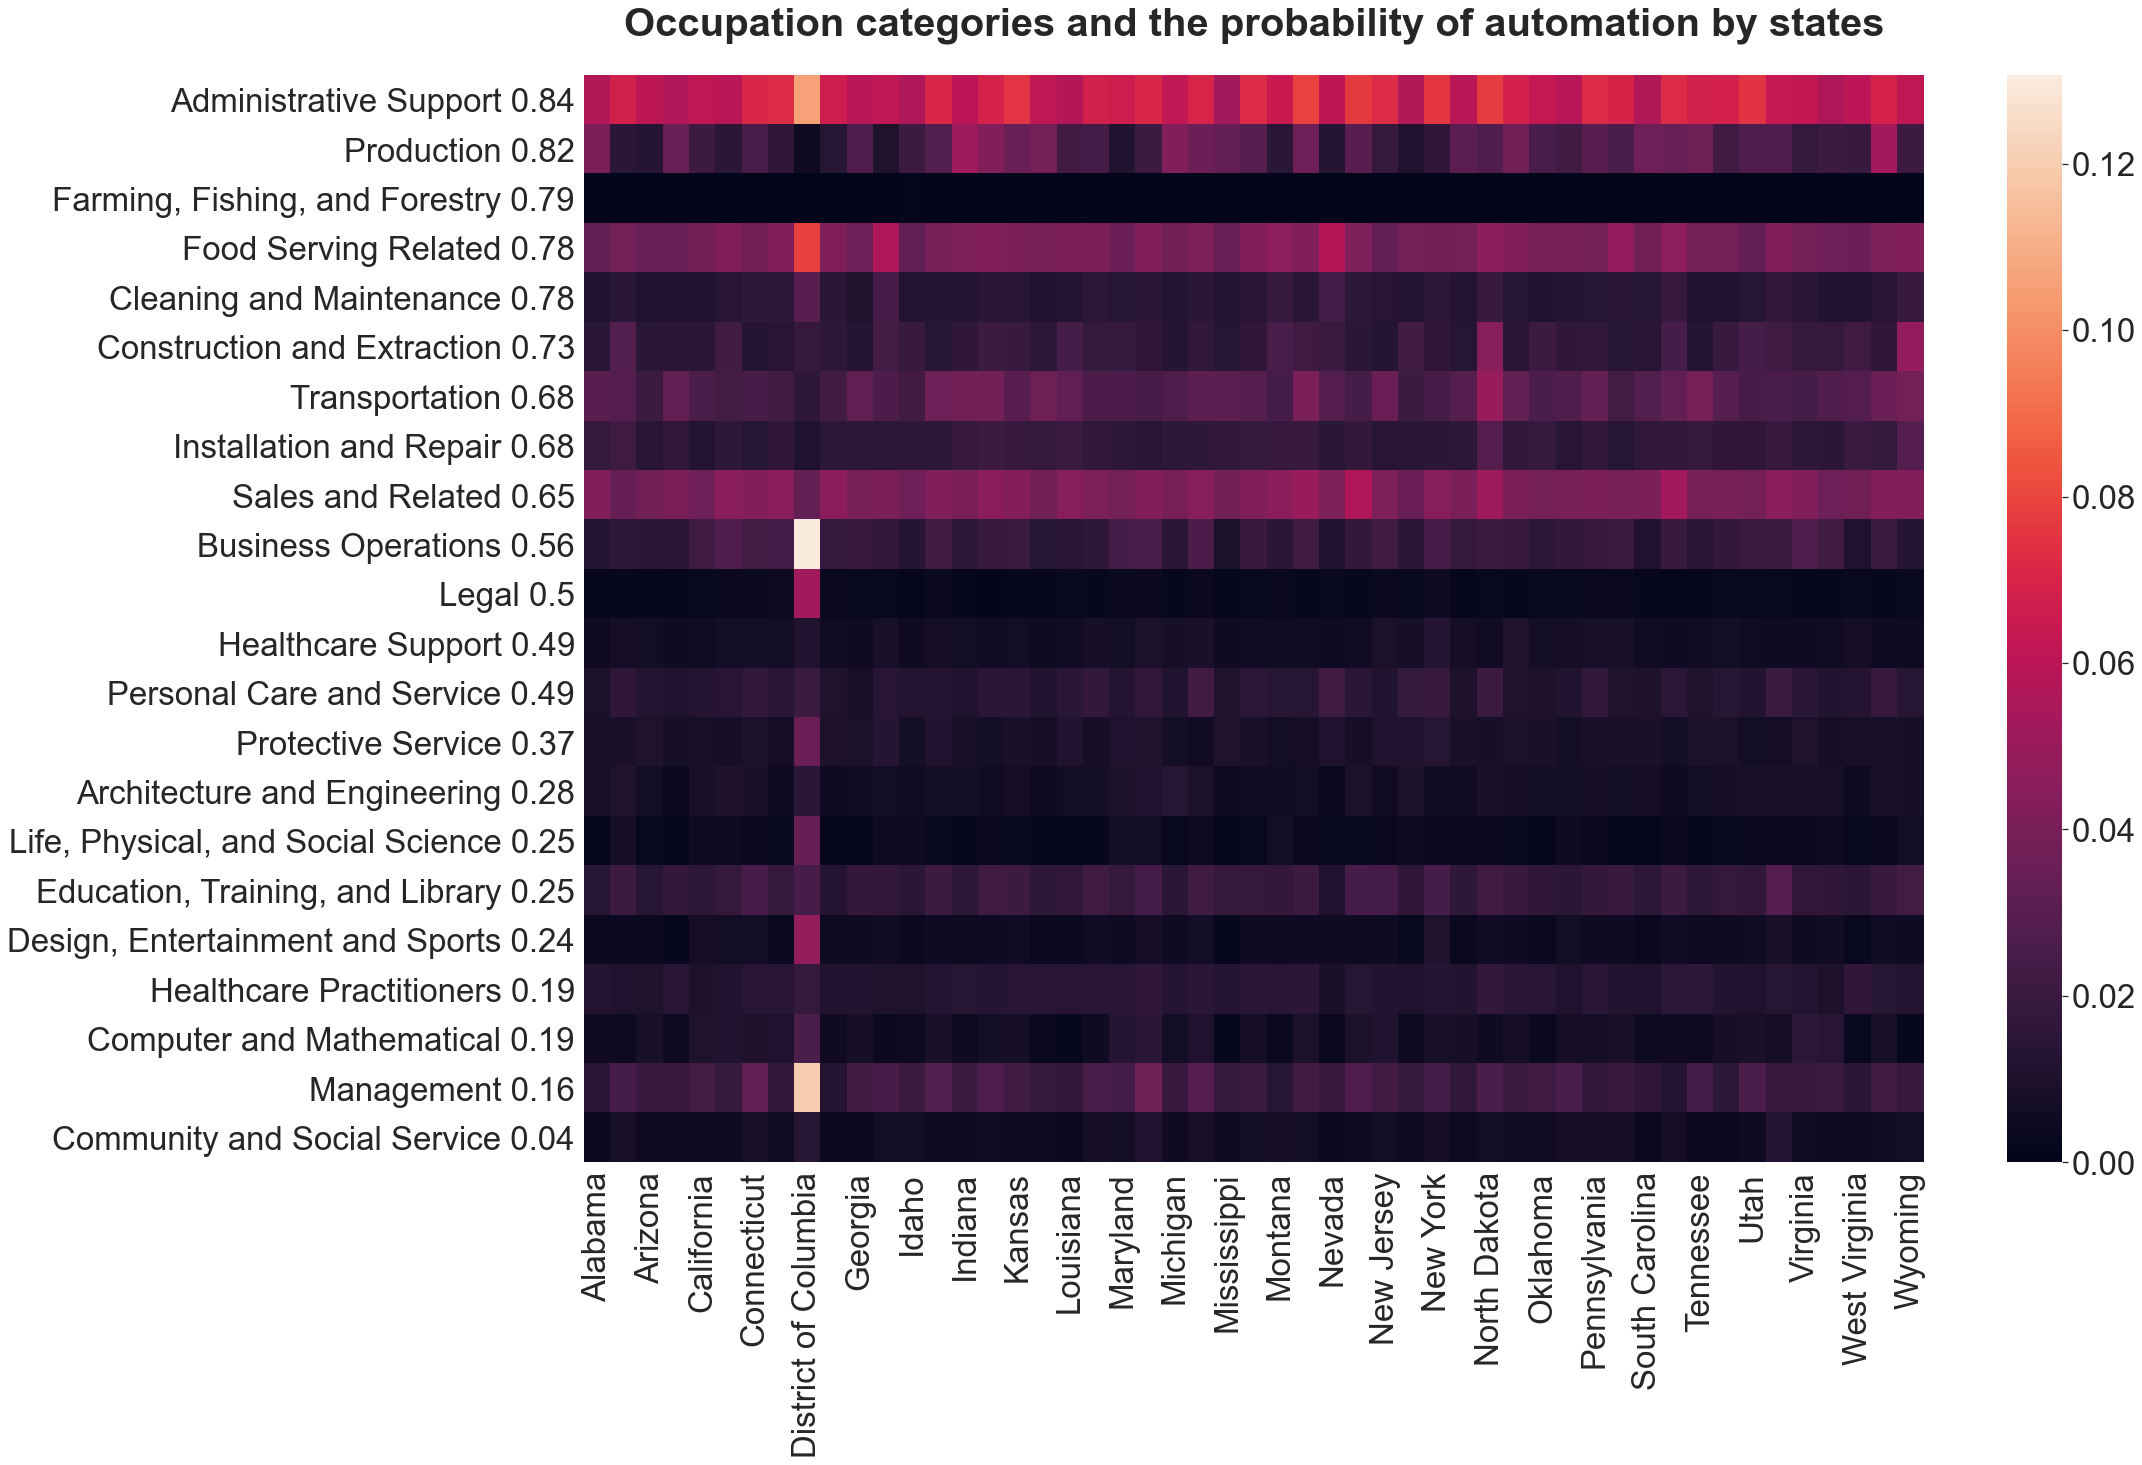

In [192]:
plot_heatmap(Occupations_groups_plot[state_names], 'Occupation categories and the probability of automation by states', False)

In [193]:
Occupations_groups_plot[state_names]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Occupations groups and Probability,,,,,,,,,,,,,,,,,,,,,
Administrative Support 0.84,0.057287,0.067774,0.061210,0.056948,0.061375,0.060095,0.071313,0.072677,0.105958,0.065965,...,0.072163,0.067983,0.068531,0.074533,0.064296,0.062372,0.055830,0.060229,0.069351,0.061321
Production 0.82,0.040625,0.015255,0.013250,0.035131,0.020600,0.015295,0.025344,0.016452,0.005214,0.013687,...,0.034725,0.036315,0.022074,0.026566,0.026940,0.018253,0.021132,0.019898,0.053304,0.020596
"Farming, Fishing, and Forestry 0.79",0.000834,0.000123,0.000093,0.001186,0.000548,0.000096,0.000034,0.000349,0.000057,0.000266,...,0.001232,0.000243,0.000206,0.000037,0.001010,0.000467,0.000825,0.000407,0.000392,0.000069
Food Serving Related 0.78,0.034009,0.038330,0.034840,0.034820,0.037830,0.042190,0.037719,0.042392,0.078271,0.042004,...,0.046798,0.038411,0.039031,0.033840,0.042340,0.038508,0.036878,0.036035,0.041728,0.043369
Cleaning and Maintenance 0.78,0.012068,0.014750,0.010805,0.011568,0.012037,0.014132,0.015906,0.015497,0.030365,0.014957,...,0.018911,0.011689,0.011392,0.013328,0.017596,0.014649,0.011334,0.012108,0.013828,0.019870
Construction and Extraction 0.73,0.014715,0.027804,0.014335,0.015176,0.014987,0.022274,0.013169,0.014049,0.018434,0.015931,...,0.024416,0.013041,0.019721,0.024180,0.022036,0.017916,0.018256,0.021756,0.016701,0.047602
Transportation 0.68,0.030223,0.028132,0.020486,0.033620,0.025859,0.023057,0.024955,0.022521,0.016125,0.022934,...,0.033018,0.039889,0.028621,0.024982,0.025786,0.024113,0.027115,0.028324,0.035298,0.038375
Installation and Repair 0.68,0.018215,0.021776,0.014182,0.016876,0.012377,0.016028,0.013463,0.016380,0.011194,0.015509,...,0.017781,0.017894,0.016782,0.016494,0.019231,0.016154,0.015030,0.019982,0.018032,0.028717
Sales and Related 0.65,0.042931,0.034256,0.037685,0.040513,0.037118,0.045414,0.042903,0.045894,0.033596,0.045739,...,0.052743,0.039332,0.039375,0.039074,0.045834,0.043039,0.037173,0.037475,0.043064,0.042367


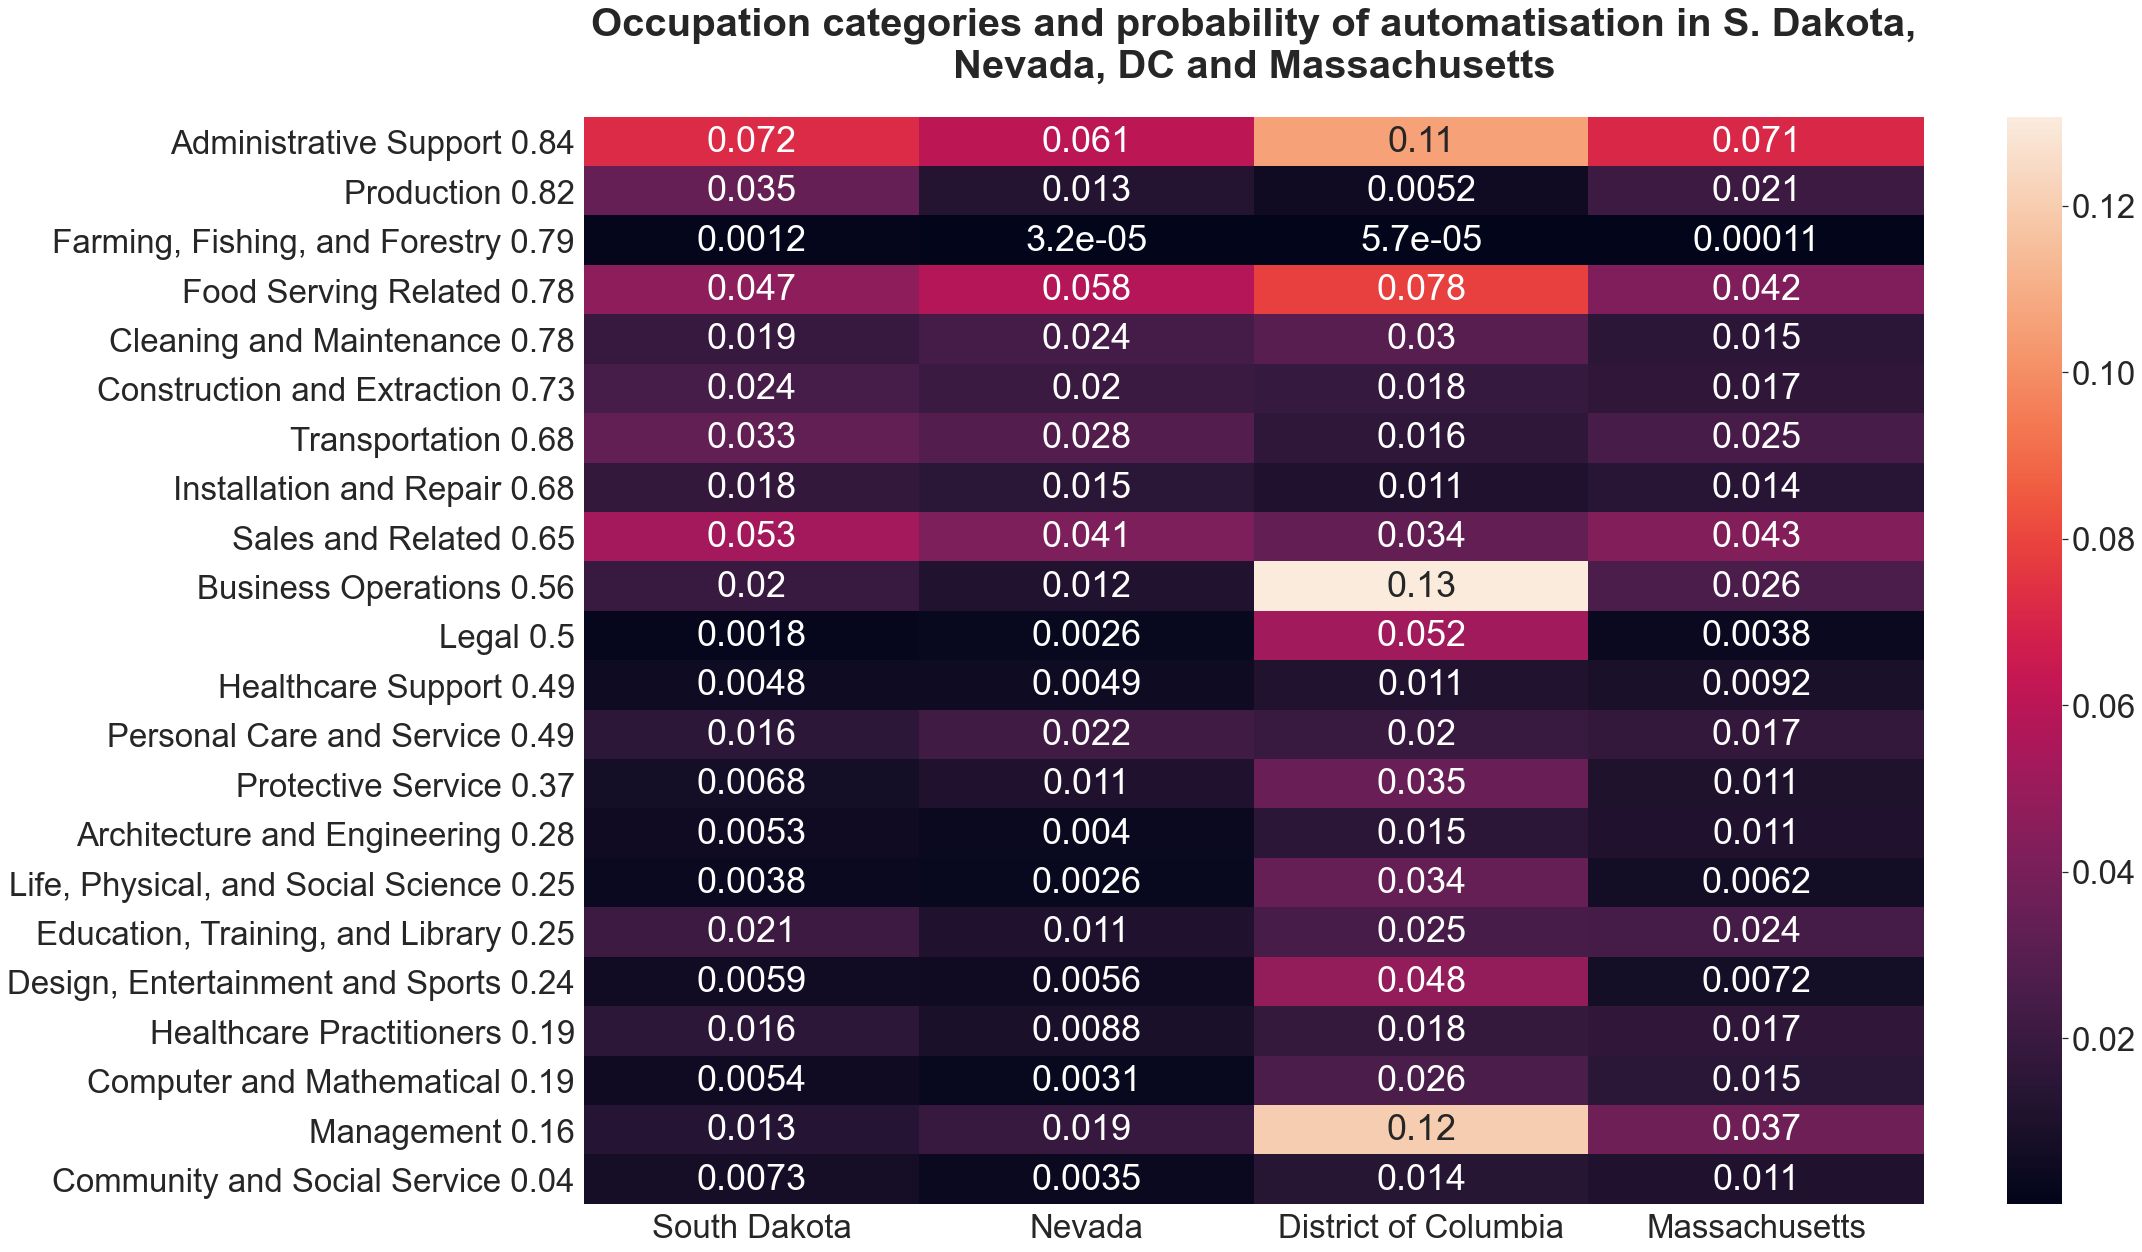

In [194]:
plot_heatmap(Occupations_groups_plot[['South Dakota', 'Nevada', 'District of Columbia', 'Massachusetts']],'Occupation categories and probability of automatisation in S. Dakota, Nevada, DC and Massachusetts', True)

# patrumpint ilgiausiu spec pav. su kodu
surast reikiamas specialybes ir jas replace.

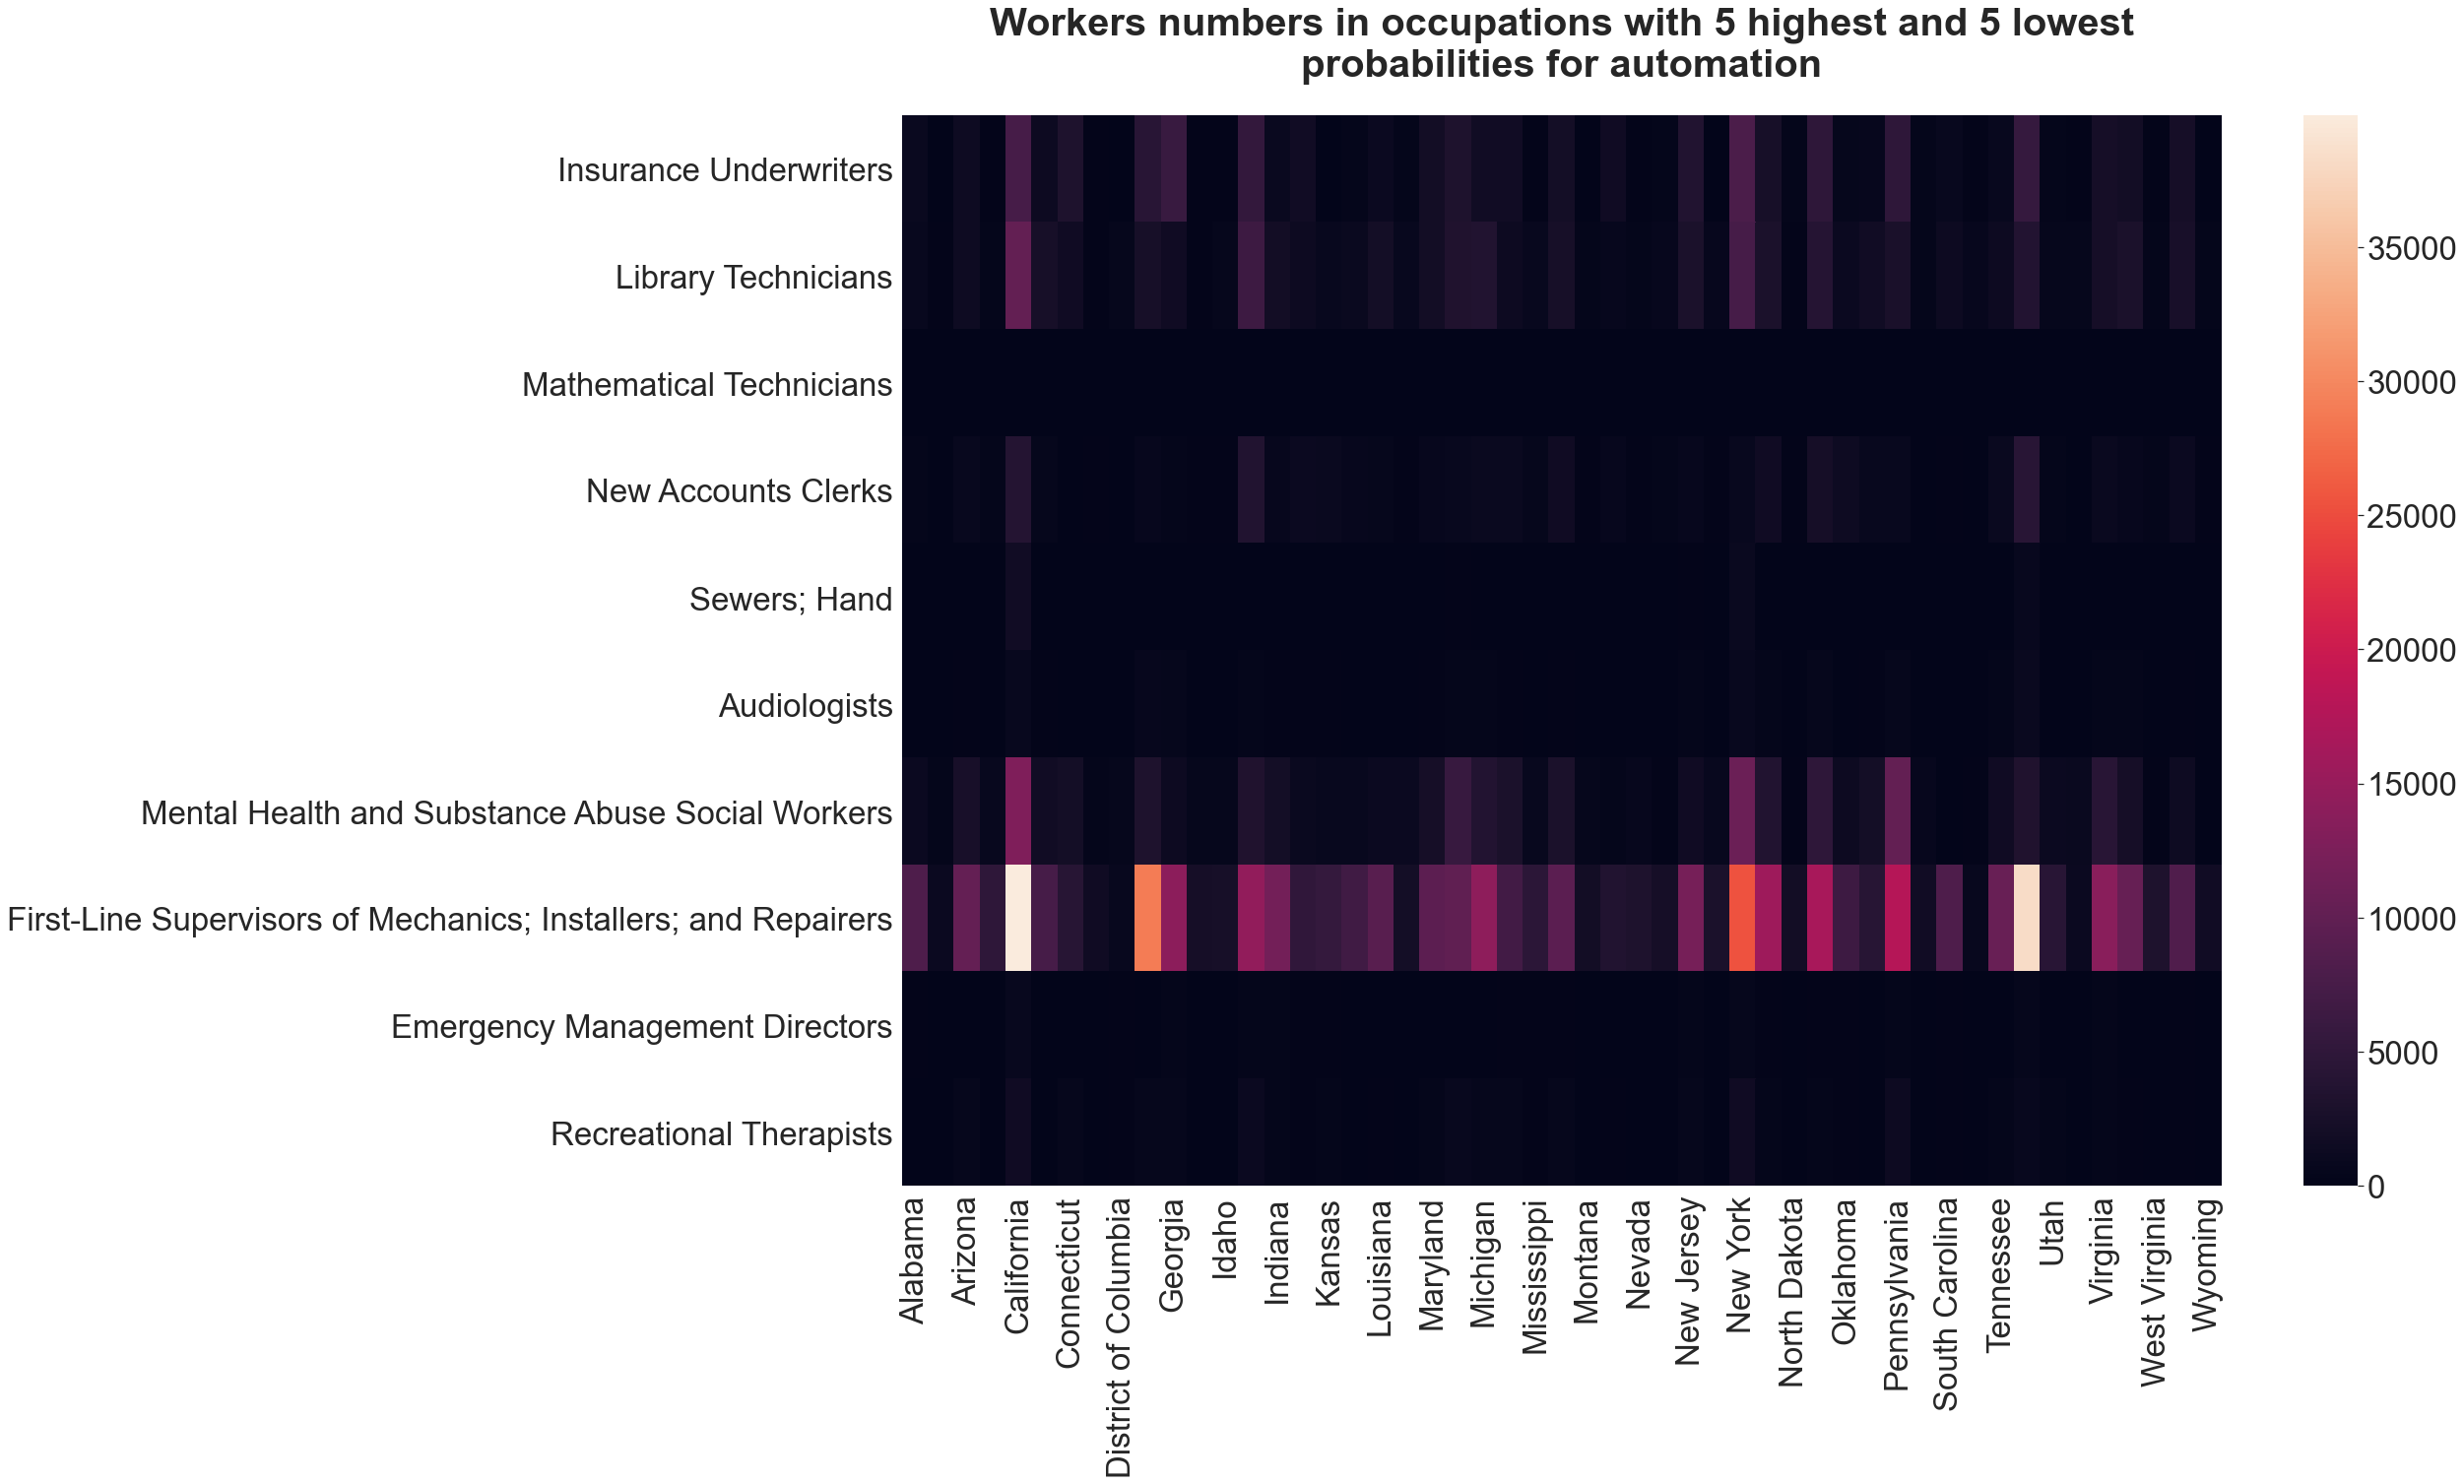

In [195]:
plot_heatmap(A_data_highest_lowest_prob_present[state_names], 'Workers numbers in occupations with 5 highest and 5 lowest probabilities for automation', False)

# **Ar sita distribution grafika palikt**
Po to pasinaudot atrnkant didelės automatizavimo specialybes ir turincias dideli skaiciu darbuotoju
US occupations number ant accupations probabilities distribution

C:\Users\marij\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<Figure size 1440x1440 with 0 Axes>

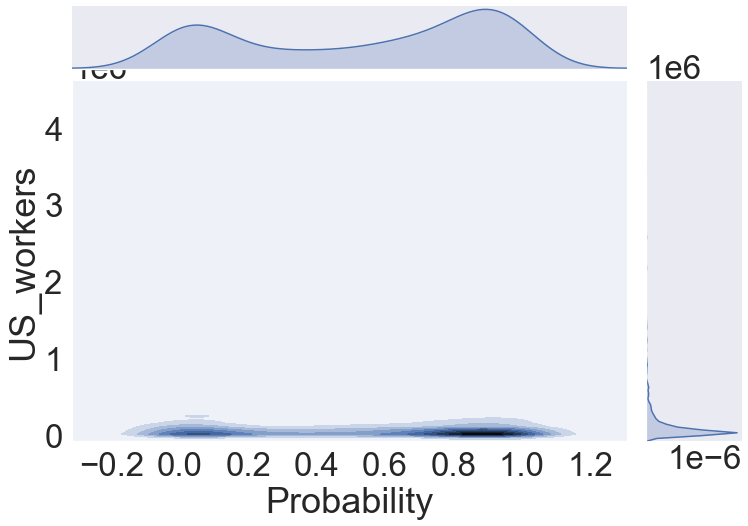

In [196]:
# plt.title("US workers numbers and Occupations automatisation probabilities distribution")
sns.set_style("dark")
plt.figure(figsize=(20,20))
fig = sns.jointplot(x=US_work['Probability'], y=US_work['US_workers'], kind="kde")
# plt.ylabel("Occupations numbers")
sns.set(font_scale=1.2)
# ax.set_ylim(1,31)
# ax.set_yticks(range(1,32))
# g.despine(bottom=True, left=True)
plt.gcf().set_size_inches(12, 8)
plt.show() 

Probability higher than 0.7  representing a "high risk category, meaning that associated occupations are potentially automatable over some unspecified number of years, perhaps a decade or two" according to the original research paper. We can look to this probability as to a time frame, where higher propabilty occupations are likely to be automated sooner.

The lost work positions and state population ratio. I take lost work position, when work automation probability ir equal to 0.7 or higher (threshold >= 0.7).

In [197]:
threshold = 0.7 # accupations automation probability threshold

## Total number of jobs positions per state

I estimated, that these total job numbers are about 10%, due to jabs position not included. I got data with all jobs where data was not available or there were less than 10 employees were marked as zero.

In [198]:
p = A_data_clean.sort_values(by=['Probability'], ascending=False)
sum_work_per_state = p[state_names].sum()
States_sum_DF = pd.DataFrame({'States':sum_work_per_state.index, 'sum_work_positions':sum_work_per_state.values})
States_sum_sort =  States_sum_DF.sort_values(by=['sum_work_positions'], ascending=False)

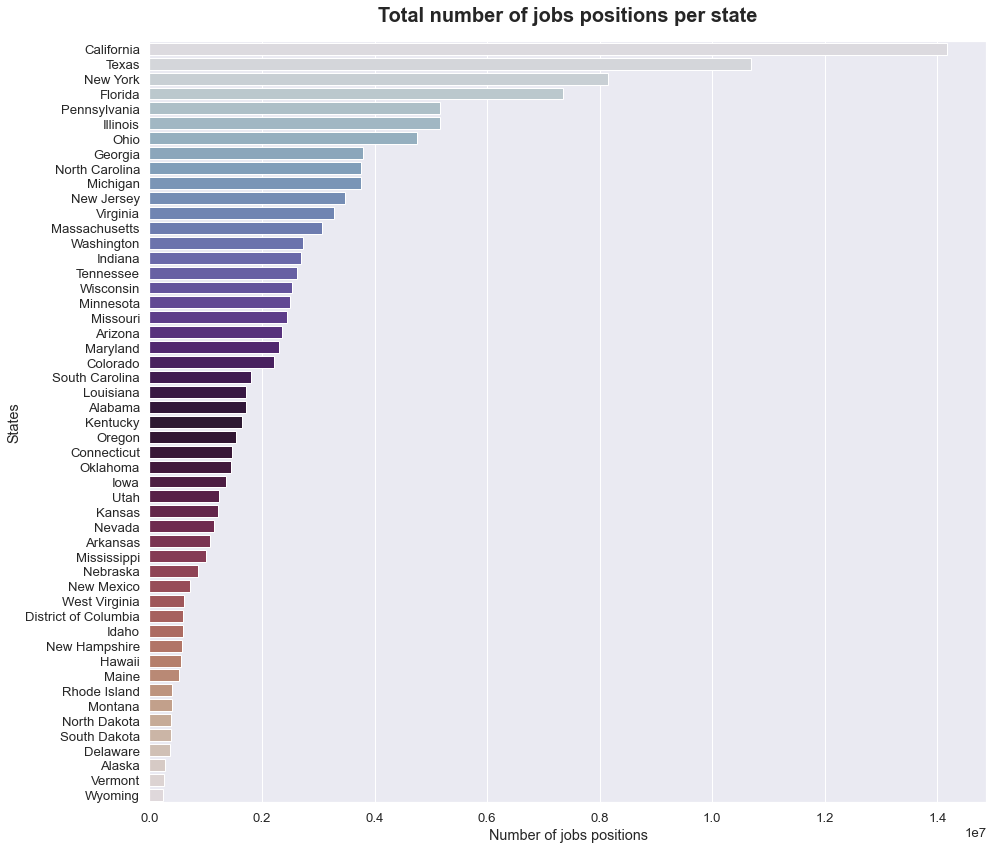

In [199]:
barplot(States_sum_sort, 'sum_work_positions', 'States', "Total number of jobs positions per state", None, 0)

# Plot second bar to every state - left absolute occupation positions when threshold < 0.7.

In [200]:
p_index = p.reset_index().drop(['level_0', 'index', 'SOC'], axis=1)
p05 = p_index.loc[(p_index.Probability < threshold)]

In [201]:
sum_work_per_state05 = p05[state_names].sum()
States_sum_DF05 = pd.DataFrame({'States':sum_work_per_state05.index, 'sum_work_positions':sum_work_per_state05.values})
States_sum_sort05 =  States_sum_DF05.sort_values(by=['sum_work_positions'], ascending=False)
States_sum_sort05.head()

,States,sum_work_positions
4,California,6902430
43,Texas,4934090
32,New York,4190980
9,Florida,3367580
13,Illinois,2581770


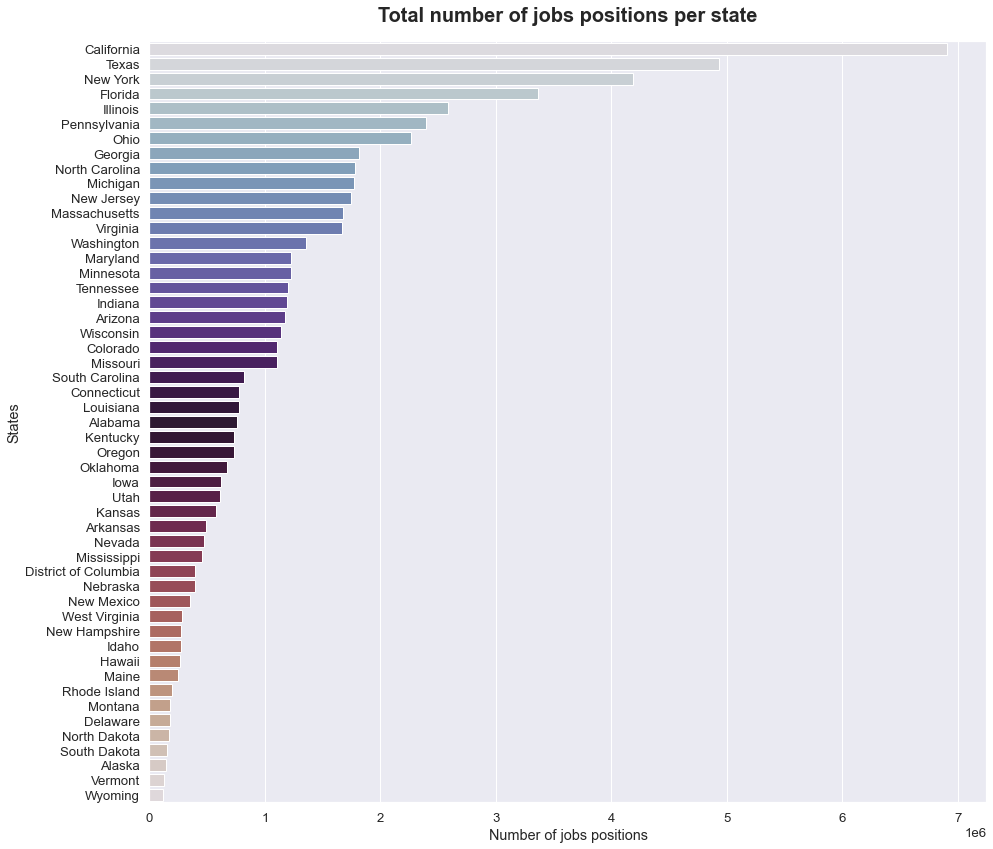

In [202]:
barplot(States_sum_sort05, 'sum_work_positions', 'States', "Total number of jobs positions per state", None, 0)

# How many jobs positions would be lost in States, if we lost accupations which have automation probability equal to 0.7 or higher.

In [203]:
States_sum_DF['Threshold'] = 1.0
States_sum_DF05['Threshold'] = threshold
States_sum_DF05.head()

,States,sum_work_positions,Threshold
0,Alabama,754110,0.7
1,Alaska,139940,0.7
2,Arizona,1169740,0.7
3,Arkansas,492410,0.7
4,California,6902430,0.7


In [204]:
Compare_sums = pd.concat([States_sum_DF, States_sum_DF05])
Compare_sums_sort = Compare_sums.sort_values(by=['sum_work_positions'], ascending=False)
Compare_sums_sort

,States,sum_work_positions,Threshold
4,California,14163090,1.0
43,Texas,10685220,1.0
32,New York,8149510,1.0
9,Florida,7349340,1.0
4,California,6902430,0.7
...,...,...,...
34,North Dakota,173290,0.7
41,South Dakota,156030,0.7
1,Alaska,139940,0.7
45,Vermont,127450,0.7


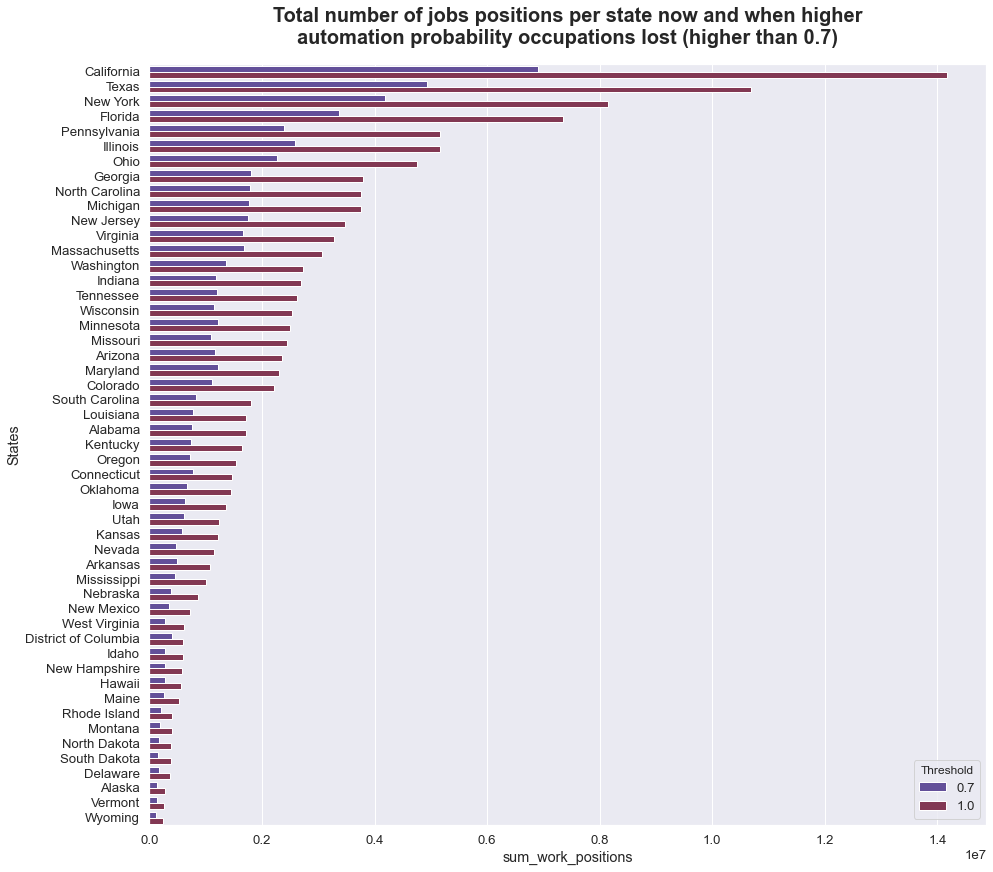

In [223]:
barplot(Compare_sums_sort, 'sum_work_positions', 'States', "Total number of jobs positions per state now and when higher automation probability occupations lost (higher than 0.7)", 'Threshold', 0)

Lets look, what are reliative loss numbers

In [206]:
States_sum_join = States_sum_DF.join(States_sum_DF05, lsuffix='', rsuffix='0.5')
States_sum_drop = States_sum_join.drop(['Threshold', 'States0.5', 'Threshold0.5'], axis=1)
Relative_jobs_drop = ((States_sum_drop['sum_work_positions']-States_sum_drop['sum_work_positions0.5'])/States_sum_drop['sum_work_positions'])*100
States_sum_drop.head()

,States,sum_work_positions,sum_work_positions0.5
0,Alabama,1722020,754110
1,Alaska,284920,139940
2,Arizona,2355040,1169740
3,Arkansas,1070380,492410
4,California,14163090,6902430


In [207]:
Relative_jobs_drop_DF = pd.DataFrame({'Lost jobs ratio':Relative_jobs_drop.values})
Relative_jobs_drop_States = States_sum_drop.join(Relative_jobs_drop_DF)
Relative_jobs_drop_States_sort = Relative_jobs_drop_States.sort_values(by=['sum_work_positions'], ascending=False)
Relative_jobs_drop_mean = Relative_jobs_drop_States_sort['Lost jobs ratio'].mean()
Relative_jobs_drop_mean

52.296073277430494

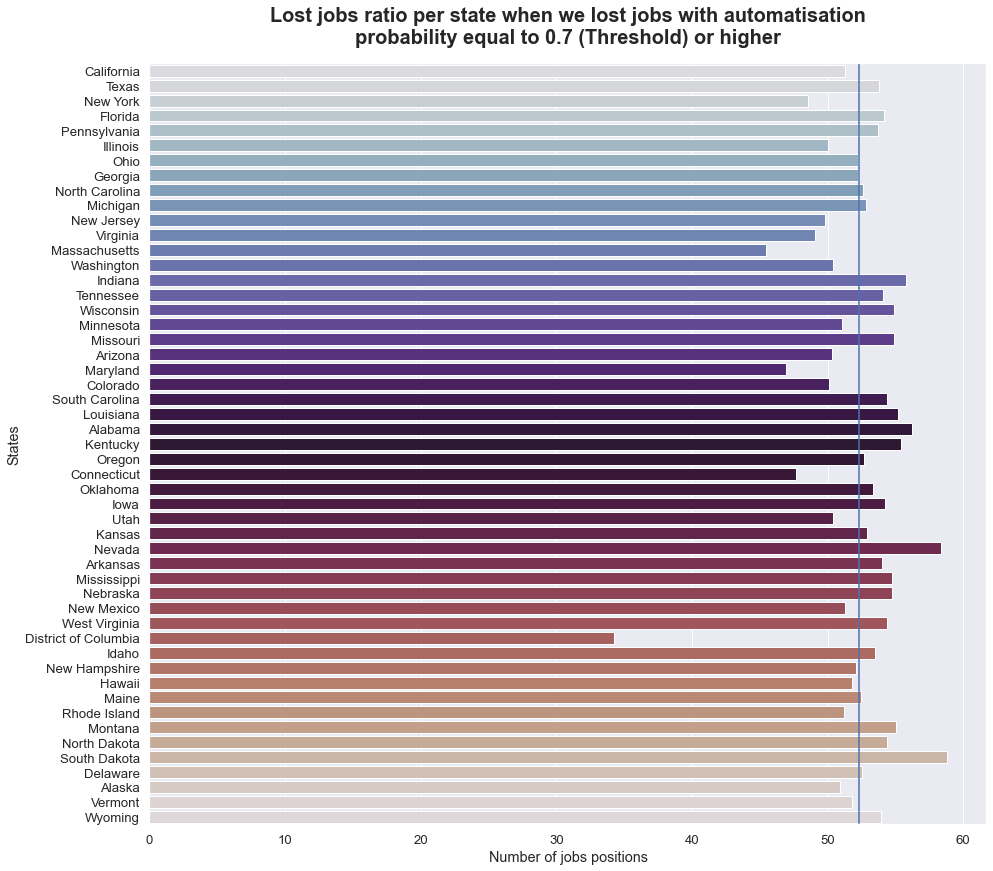

In [208]:
barplot(Relative_jobs_drop_States_sort, 'Lost jobs ratio in percent', 'States', "Lost jobs ratio per state when we lost jobs with automatisation probability equal to 0.7 (Threshold) or higher", None, Relative_jobs_drop_mean)

In [209]:
Relative_jobs_drop_mean

52.296073277430494

In [210]:
Relative_jobs_drop_States_highest = Relative_jobs_drop_States.sort_values(by=['Lost jobs ratio'], ascending=False)

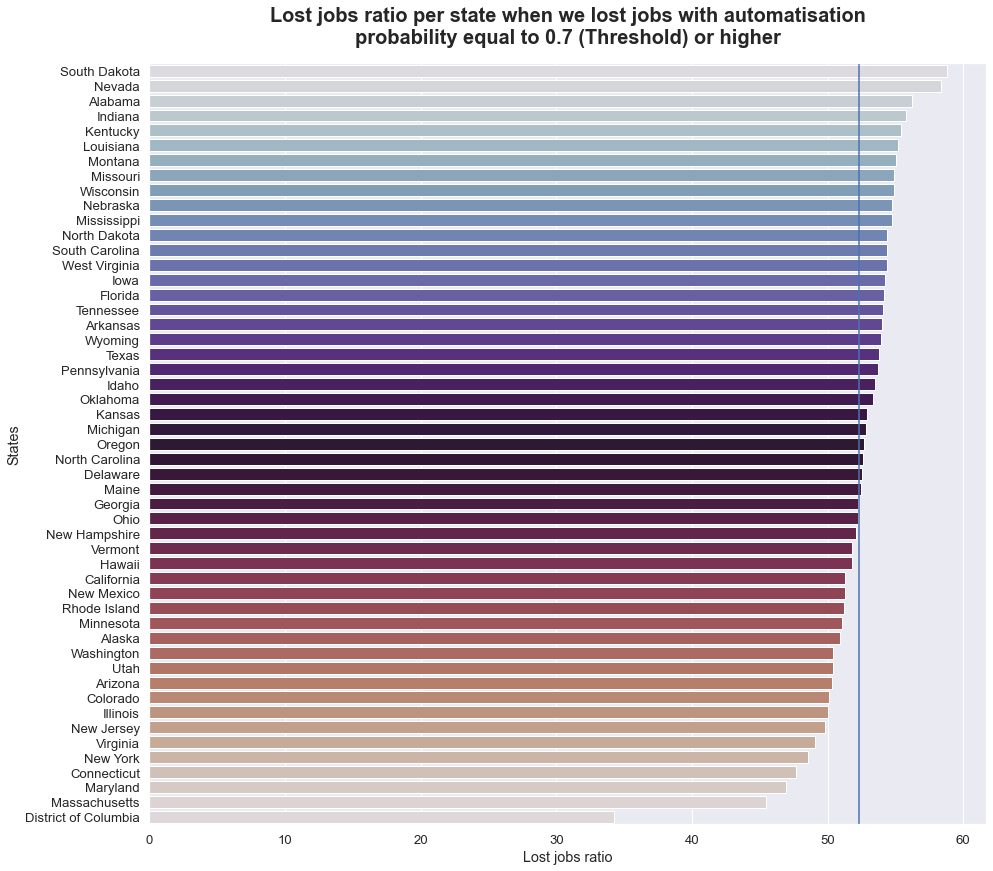

In [222]:
barplot(Relative_jobs_drop_States_highest, 'Lost jobs ratio in percent', 'States', "Lost jobs ratio per state when we lost jobs with automatisation probability equal to 0.7 (Threshold) or higher", None, Relative_jobs_drop_mean)

# South Dakota and Nevada have most jobs losses. Lets look, what are biggest occupations they lost

Let's start with Nevada data

In [212]:
nevada = A_data_clean[['Occupation', 'Probability', 'South Dakota', 'Nevada']].sort_values(by=['Probability'], ascending=False)
nevada07_full = nevada.loc[(nevada.Probability >= threshold)].sort_values(by=['Nevada'], ascending=False).reset_index()
nevada07 = nevada07_full.head(9)
nevada07_tail = nevada07_full.tail(308).Nevada.sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'South Dakota': 0, 'Nevada': nevada07_tail} 
nevada07 = nevada07.append(df2, ignore_index = True) 
nevada07
# fgnfghn

,index,Occupation,Probability,South Dakota,Nevada
0,354.0,Retail Salespersons,0.92,15500,49650
1,306.0,Waiters and Waitresses,0.94,7240,39450
2,350.0,Cashiers,0.97,13200,34490
3,304.0,Combined Food Preparation and Serving Workers;...,0.92,9390,30950
4,416.0,Office Clerks; General,0.96,3670,27320
5,674.0,Laborers and Freight; Stock; and Material Move...,0.85,7060,26770
6,324.0,Gaming Dealers,0.96,280,21500
7,292.0,Security Guards,0.84,1120,21230
8,300.0,Cooks; Restaurant,0.96,1830,20860
9,NaN,Other,0.00,0,414130


Plot pie chart of Nevada data

In [213]:
nevada07['Occupation']

0                                  Retail Salespersons
1                               Waiters and Waitresses
2                                             Cashiers
3    Combined Food Preparation and Serving Workers;...
4                               Office Clerks; General
5    Laborers and Freight; Stock; and Material Move...
6                                       Gaming Dealers
7                                      Security Guards
8                                    Cooks; Restaurant
9                                                Other
Name: Occupation, dtype: object

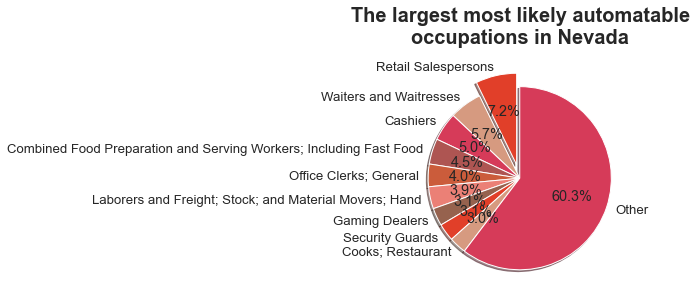

In [214]:
plot_pie(nevada07['Nevada'], "The largest most likely automatable occupations in Nevada", nevada07['Occupation'])

Now let's look to South Dakota

In [215]:
dakota = A_data_clean[['Occupation', 'Probability', 'South Dakota']].sort_values(by=['Probability'], ascending=False)
dakota07_full = dakota.loc[(dakota.Probability >= threshold)].sort_values(by=['South Dakota'], ascending=False).reset_index()
dakota07 = dakota07_full.head(9)
dakota07_tail = dakota07_full.tail(308)['South Dakota'].sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'South Dakota': dakota07_tail} 
dakota07 = dakota07.append(df2, ignore_index = True) 
dakota07

,index,Occupation,Probability,South Dakota
0,354.0,Retail Salespersons,0.92,15500
1,350.0,Cashiers,0.97,13200
2,373.0,Bookkeeping; Accounting; and Auditing Clerks,0.98,9610
3,304.0,Combined Food Preparation and Serving Workers;...,0.92,9390
4,647.0,Heavy and Tractor-Trailer Truck Drivers,0.79,7770
5,306.0,Waiters and Waitresses,0.94,7240
6,674.0,Laborers and Freight; Stock; and Material Move...,0.85,7060
7,409.0,Secretaries and Administrative Assistants; Exc...,0.96,5840
8,360.0,Sales Representatives; Wholesale and Manufactu...,0.85,5390
9,NaN,Other,0.00,146890


Plot pie chart of South Dakota data

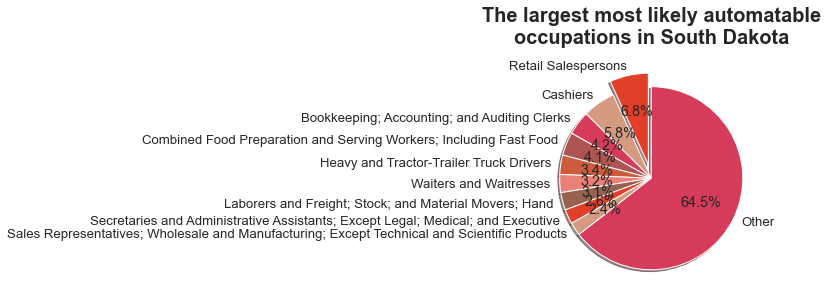

In [216]:
plot_pie(dakota07['South Dakota'], "The largest most likely automatable occupations in South Dakota", dakota07['Occupation'])

District of Columbia has lowest sensitivity for automation. Let's check the data

In [217]:
DC = A_data_clean[['Occupation', 'Probability', 'District of Columbia']].sort_values(by=['Probability'], ascending=False)
DC07_full = DC.loc[(DC.Probability >= threshold)].sort_values(by=['District of Columbia'], ascending=False).reset_index()
DC07 = DC07_full.head(9)
DC07_tail = DC07_full.tail(308)['District of Columbia'].sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'District of Columbia': DC07_tail} 
DC07 = DC07.append(df2, ignore_index = True) 
DC07

,index,Occupation,Probability,District of Columbia
0,292.0,Security Guards,0.84,15140
1,409.0,Secretaries and Administrative Assistants; Exc...,0.96,14720
2,47.0,Accountants and Auditors,0.94,11080
3,416.0,Office Clerks; General,0.96,10000
4,350.0,Cashiers,0.97,9270
5,304.0,Combined Food Preparation and Serving Workers;...,0.92,8750
6,306.0,Waiters and Waitresses,0.94,8720
7,354.0,Retail Salespersons,0.92,6500
8,300.0,Cooks; Restaurant,0.96,6200
9,NaN,Other,0.00,121160


District of Columbia pie chart

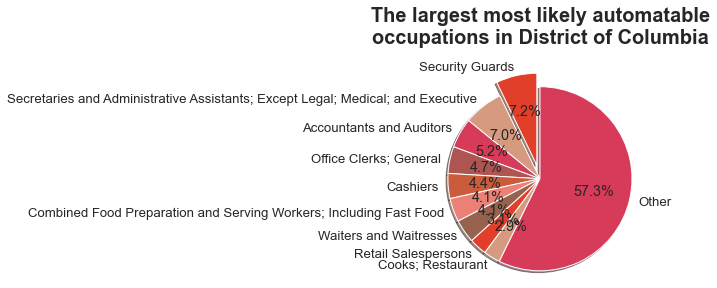

In [218]:
plot_pie(DC07['District of Columbia'], "The largest most likely automatable occupations in District of Columbia", DC07['Occupation'])

Massachusetts data

In [219]:
massachusetts = A_data_clean[['Occupation', 'Probability', 'Massachusetts']].sort_values(by=['Probability'], ascending=False)
massachusetts07_full = massachusetts.loc[(nevada.Probability >= threshold)].sort_values(by=['Massachusetts'], ascending=False).reset_index()
massachusetts07 = massachusetts07_full.head(9)
massachusetts07_tail = massachusetts07_full.tail(308).Massachusetts.sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'Massachusetts': massachusetts07_tail} 
massachusetts07 = massachusetts07.append(df2, ignore_index = True) 
massachusetts07

,index,Occupation,Probability,Massachusetts
0,354.0,Retail Salespersons,0.92,107880
1,350.0,Cashiers,0.97,72200
2,416.0,Office Clerks; General,0.96,63080
3,306.0,Waiters and Waitresses,0.94,61350
4,304.0,Combined Food Preparation and Serving Workers;...,0.92,57700
5,409.0,Secretaries and Administrative Assistants; Exc...,0.96,43310
6,373.0,Bookkeeping; Accounting; and Auditing Clerks,0.98,42930
7,344.0,Personal Care Aides,0.74,42190
8,674.0,Laborers and Freight; Stock; and Material Move...,0.85,36350
9,NaN,Other,0.00,905140


Massachusetts pie chart**

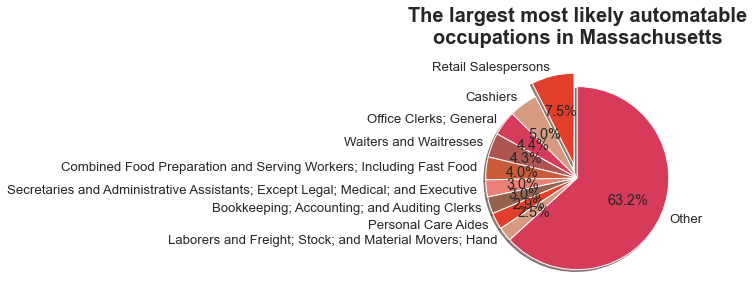

In [220]:
plot_pie(massachusetts07['Massachusetts'], "The largest most likely automatable occupations in Massachusetts", massachusetts07['Occupation'])

# Conclusions

1. The most robust occupations for automatisations: Saugiausios specialybės nuo automatizacijos: social service, management, computer and mathematical and medicine. The most sensitive: administrative support, production, farming, fishing, forestry, food serving related.
2. A bit more occupations have higher probability for automatisation
3. US would loss around half of all jobs, if automatisation take out occupations with automatisation probability equal to 0.7 or higher?
4. South Dakota and Nevada are the most sensitive and District of Columbia and Massachusetts are the most robust to automatisation.
5. Nevada and South Dakota have most occupations with high probability for automation. District of Columbia also has many occupations with low probability for automatisation like management, arts and protective service.